# Making the dataset from scraped images

In [97]:
import numpy as np 

import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
def rename_images(directory,suffix):
    '''
    Rename all the files inside the directory "directory" with the name "suffix{#].png"
    
    directory: '.scraped_images/{shiba/jindo}'
    suffix: 'shiba'/'jindo'
    '''
    os.chdir(directory)
    i = 1
    for image in os.listdir('.'):
        if image.startswith('.'):
            continue
        name = '{}{}'.format(suffix,str(i))
        os.rename(image,name)
        i += 1
    
    j = 1
    for image in os.listdir('.'):
        if image.startswith('.'):
            continue
        final_name = '{}{}.png'.format(suffix,str(j))
        os.rename(image,final_name)
        j += 1
    
    os.chdir('..')
    os.chdir('..')
    
    print('Done')

In [74]:
def count_images(directory):
    count = 0
    for image in os.listdir(directory):
        if image.startswith('.'):
            continue
        count += 1
    return count

In [3]:
!pwd

/Users/Rich/Desktop/Flatiron/Mod_5_proj/shiba_vs_jindo


In [78]:
print('There are {} shiba images and {} jindo images'.format(count_images('./scraped_images/shiba'), count_images('./scraped_images/jindo')))

There are 332 shiba images and 350 jindo images


In [68]:
rename_images('./scraped_images/jindo','jindo')

Done


In [69]:
rename_images('./scraped_images/shiba','shiba')

Done


In [79]:
print('There are {} shiba images and {} jindo images'.format(count_images('./scraped_images/shiba'), count_images('./scraped_images/jindo')))

There are 332 shiba images and 350 jindo images


To finish making the original dataset:
1. Delete any 18 jindo images for balance number of images
2. Take 15 from jindo and shiba into a dir called test set
3. Take 15 again for validation
3. Put the rest into a train folder
4. Rename "scraped_images directory to __"dataset"__

In [83]:
#Final directories
!ls 

README.md               dataset                 original_data.zip
cnn_bal1.pickle         image_processing.ipynb  transfer_learning.ipynb
cnn_dropout.pickle      image_scraper.ipynb
cnn_notebook.ipynb      images


In [84]:
!ls dataset

backup_images test          train         val


# Data Augmentation onto train data

Using Keras preprocessing to do data augmentation onto train data to bring up number of datapoints to be sufficient for a CNN

In [82]:
!pwd

/Users/Rich/Desktop/Flatiron/Mod_5_proj/shiba_vs_jindo


In [89]:
os.chdir('./dataset/train')

In [90]:
random_seed = 123

In [92]:
# get all the data in the directory split/test, and reshape them
data_all = ImageDataGenerator(rescale = 1./225).flow_from_directory( 
        '.', 
        target_size=(224, 224), 
        batch_size = 532,
        classes = ['jindo','shiba'],
        class_mode = 'binary',
         seed = random_seed
) 

images, labels = next(data_all)

Found 604 images belonging to 2 classes.


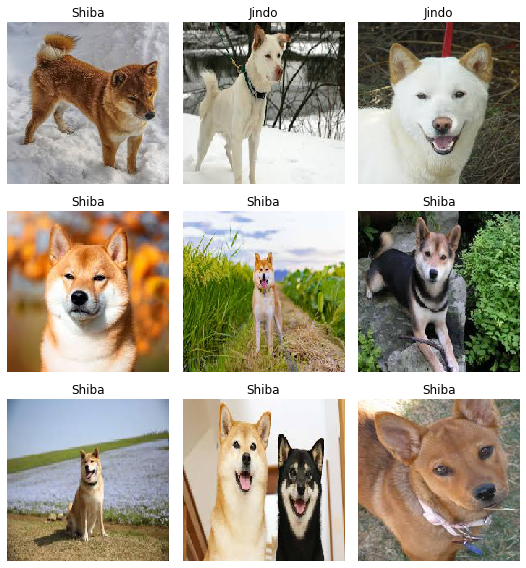

In [102]:
for i in range(9):
        plt.figure(1 , figsize = (8,8))
        plt.subplot(330 + 1 + i)
        plt.imshow((images[i]*225).astype(np.uint8)) #cast to avoid clipping data error
        plt.axis('off') #Turn axes on or off
        plt.subplots_adjust(hspace = 0.5, wspace = 0.01)
        if labels[i] == 0:
            class_ = 'Jindo'
        else:
            class_ = 'Shiba'
        plt.title(class_)

plt.tight_layout()

# plt.savefig('data_augmented.png', bbox_inches='tight', transparent = True)        
plt.show()

In [ ]:
img_gen1 = ImageDataGenerator(rescale=1./255, 
                             rotation_range=-20,
                             horizontal_flip=True,
                             fill_mode= 'reflect')

data_generatation_1 = img_gen1.flow_from_directory( 
        './data', 
        target_size=(224, 224), 
        batch_size = 532,
        classes = ['jindo','shiba'], 
        class_mode = 'binary',
        seed = random_seed
) 

images_gen1, labels_gen1 = next(data_generatation_1)